In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
from utilities.ML_algorithms import create_RF_model, create_XGB_model, create_ANN_model
from utilities.plot_results import plot_prediction, plot_scores, plot_feature_importance

In [2]:
cs_file = '../data/SMB_input_belli_ERA5.csv'

df_test = pd.read_csv(cs_file, delimiter='\t', index_col=['Date'], parse_dates=['Date'], na_values='NAN')

cs_file = '../data/SMB_input_four_ERA5.csv'

df_train = pd.read_csv(cs_file, delimiter='\t', index_col=['Date'], parse_dates=['Date'], na_values='NAN')


In [4]:
df_train.reset_index(inplace=True)
df_train = df_train.sort_values(by = ['Elevation', 'Date'], ascending=True)

In [5]:
label_stake = df_train.drop_duplicates(subset=['Elevation']).reset_index()[['Elevation', 'Stake']]
label_stake

,Elevation,Stake
0,96.8,PG19
1,121.0,PG09
2,131.4,PG18
3,159.1,PG08
4,167.2,PG17
5,188.6,PG07
6,194.5,PG16_AWS
7,223.7,PG06
8,229.4,PG16
9,247.9,PG05


In [6]:
label_stake_mod = label_stake.copy()
label_stake_mod.index = label_stake_mod['Elevation']
range_elev = np.arange(90,470, 30)
range_elev[-1] = range_elev[-1] + 30
range_elev

array([ 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 480])

In [7]:
grupos_ele = []
for i in range(len(range_elev)-1):
    print(i)
    grupos_ele.append(label_stake_mod.loc[range_elev[i]:range_elev[i+1]])

0
1
2
3
4
5
6
7
8
9
10
11


In [8]:
for i in range(len(grupos_ele)):
    df_train['Stake'].replace(grupos_ele[i]['Stake'].values.tolist(), 'G'+str(i), inplace = True)

In [11]:
df_train.index = df_train['Stake']

In [12]:
df_train.index.value_counts().values

array([228, 228, 225, 216, 182, 116,  30,  18,  17,  12,  11,  10])

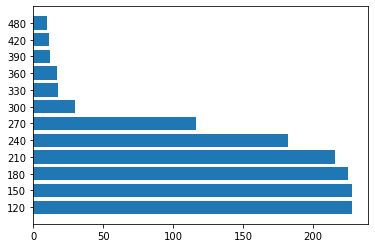

In [13]:
fig, ax = plt.subplots()
ax.barh(np.arange(len(range_elev)-1), df_train.index.value_counts().values)
ax.set_yticks(np.arange(len(range_elev)-1))
ax.set_yticklabels(range_elev[1:])
print()

In [21]:
label_stake = df_train.drop_duplicates(subset=['Stake']).reset_index(drop=True)[['Stake']]
label_stake

,Stake
0,G0
1,G1
2,G2
3,G3
4,G4
5,G5
6,G6
7,G7
8,G8
9,G9


In [20]:
random_stake1 = np.arange(0,6,1)
random_stake2 = np.sort(np.arange(6,12,1))[::-1]
index_test = np.stack((random_stake1, random_stake2), axis=1)
index_test

array([[ 0, 11],
       [ 1, 10],
       [ 2,  9],
       [ 3,  8],
       [ 4,  7],
       [ 5,  6]])